In [599]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns
import re
from os import path
from glob import glob
from tqdm import tqdm
import numpy as np
from matplotlib import cm


In [600]:
ROOT_PATH = '\\\\CILab_NAS_Data/homes/inchang/PuzzlePCG/ProxyPlayer'

In [601]:
files = glob(path.join(ROOT_PATH, '*', 'MatchResult_*.csv'))


In [602]:
StatisticsColumns = [
    'ReachedKnowledgeStep', 'AlmostReachedKnowledgeStep',
    'Matched_HorizontalPiece', 'Matched_VerticalPiece', 'Matched_CrossPiece', 'Matched_RocketPiece', 'Matched_BombPiece', 'Matched_RainbowPiece']

In [603]:
def parse_filename(data):
    result = dict()
    for i in range(0, len(data), 2):
        result[data[i]] = data[i+1]
    return result

In [604]:
dfs = []
for file_path in tqdm(files):
    # print(file_path)
    file_name = path.basename(file_path)

    _file_name = file_name.split('_')[1:-1]
    args = parse_filename(_file_name)

    df = pd.read_csv(file_path)

    for key, value in args.items():
        df[key] = value
    dfs.append(df)

original_df = pd.concat(dfs)

original_df['Sum_Matched'] = original_df['Matched_HorizontalPiece'] + original_df['Matched_HorizontalPiece'] + original_df['Matched_HorizontalPiece']  + \
    original_df['Matched_HorizontalPiece'] + original_df['Matched_HorizontalPiece'] + original_df['Matched_HorizontalPiece']
original_df.loc[original_df['method'] == 'random', 'simulation'] = 0

original_df['simpleEffect'] = original_df['simpleEffect'].replace(np.nan, 0)
original_df['objective'] = original_df['objective'].replace(np.nan, '-')


100%|██████████| 10/10 [00:00<00:00, 103.07it/s]


In [605]:
match_result = original_df.groupby(['method', 'objective', 'simulation'])['Matched_HorizontalPiece',
                                      'Matched_VerticalPiece',
                                      'Matched_CrossPiece',
                                      'Matched_RocketPiece',
                                      'Matched_BombPiece',
                                      'Matched_RainbowPiece',
                                      'AlmostReachedKnowledgeStep', 'ReachedKnowledgeStep',
                                      'Sum_Matched'].agg(
    {
        'AlmostReachedKnowledgeStep': ['mean'],
        'ReachedKnowledgeStep': ['mean'],
        'Matched_HorizontalPiece':['mean', 'count'],
        'Matched_VerticalPiece':['mean'],
        'Matched_CrossPiece':['mean'],
        'Matched_RocketPiece':['mean'],
        'Matched_BombPiece':['mean'],
        'Matched_RainbowPiece':['mean'],
        'Sum_Matched':['mean'],
     }
)
match_result

C:\Users\GIST\.conda\envs\mlagents\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


AlmostReachedKnowledgeStep ReachedKnowledgeStep  \
                                                  mean                 mean   
method objective simulation                                                   
mcts   knowledge 100                        102.875000           116.910714   
                 200                        119.526316           127.631579   
                 400                        103.075472           114.226415   
       score     100                         95.321429           100.607143   
                 200                         88.958333           108.333333   
                 400                         95.538462           120.769231   
random -         0                          115.134228           127.966443   

                            Matched_HorizontalPiece        \
                                               mean count   
method objective simulation                                 
mcts   knowledge 100                      74.517857    56   
                 200                      77.877193    57   
                 400                      78.339623    53   
       score     100                      74.321429    28   
                 200                      75.458333    24   
                 400                      83.538462    26   
random -         0                        45.369128   149   

                            Matched_VerticalPiece Matched_CrossPiece  \
                                             mean               mean   
method objective simulation                                            
mcts   knowledge 100                    55.625000          10.339286   
                 200                    58.350877          10.947368   
                 400                    56.018868          11.849057   
       score     100                    55.892857          10.178571   
                 200                    55.458333          11.291667   
                 400                    58.269231          11.269231   
random -         0                      30.664430           5.382550   

                            Matched_RocketPiece Matched_BombPiece  \
                                           mean              mean   
method objective simulation                                         
mcts   knowledge 100                 122.142857          9.678571   
                 200                 128.210526          8.719298   
                 400                 124.188679          8.962264   
       score     100                 123.535714         10.142857   
                 200                 132.666667         10.625000   
                 400                 129.384615          7.923077   
random -         0                    83.624161          6.395973   

                            Matched_RainbowPiece Sum_Matched  
                                            mean        mean  
method objective simulation                                   
mcts   knowledge 100                   12.017857  447.107143  
                 200                   11.350877  467.263158  
                 400                   13.471698  470.037736  
       score     100                   10.857143  445.928571  
                 200                   14.000000  452.750000  
                 400                   14.653846  501.230769  
random -         0                      7.825503  272.214765

In [606]:
def get_legend_name(x):
    if x['method'] == 'mcts':
        return f"{x['method']}_{x['objective']}_{x['simulation']}"
    else:
        return f"{x['method']}"

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'r_step'),
  Text(1, 0, 'ar_step'),
  Text(2, 0, 'b0'),
  Text(3, 0, 'b1'),
  Text(4, 0, 'b2'),
  Text(5, 0, 'b3'),
  Text(6, 0, 'b4'),
  Text(7, 0, 'b5')])

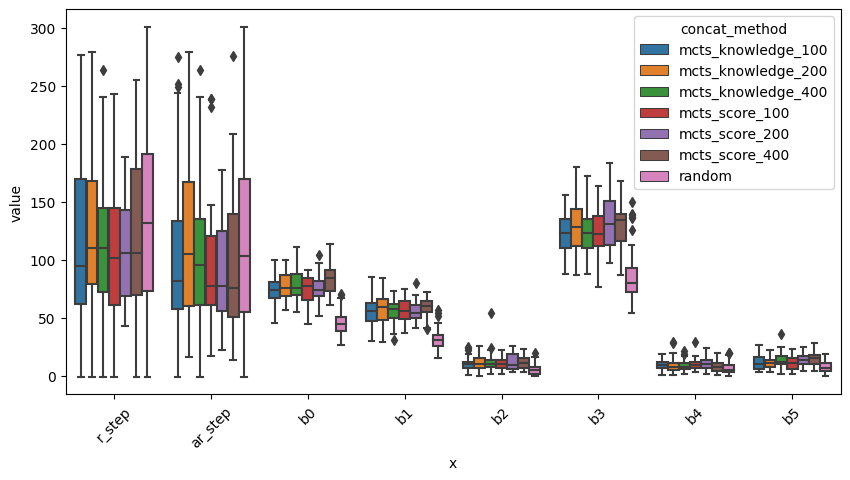

In [608]:
melted_df = original_df.copy()
melted_df['concat_method'] = melted_df.agg(lambda x: get_legend_name(x), axis=1)


plt.figure(figsize=(10, 5))


melted_df = pd.melt(melted_df, id_vars=['EpisodeCount', 'objective', 'concat_method', 'simulation'],
                    value_vars=[*StatisticsColumns], ignore_index=False)
# melted_df['x'] = 'sf' + melted_df['simpleEffect'].astype(str) + '_' + melted_df['variable']
melted_df['x'] = melted_df['variable']
melted_df['x'] = melted_df['x'].str.replace('AlmostReachedKnowledgeStep', 'ar_step')
melted_df['x'] = melted_df['x'].str.replace('ReachedKnowledgeStep', 'r_step')

melted_df['x'] = melted_df['x'].str.replace('Matched_HorizontalPiece', 'b0')
melted_df['x'] = melted_df['x'].str.replace('Matched_VerticalPiece', 'b1')
melted_df['x'] = melted_df['x'].str.replace('Matched_CrossPiece', 'b2')
melted_df['x'] = melted_df['x'].str.replace('Matched_RocketPiece', 'b3')
melted_df['x'] = melted_df['x'].str.replace('Matched_BombPiece', 'b4')
melted_df['x'] = melted_df['x'].str.replace('Matched_RainbowPiece', 'b5')


ax = sns.boxplot(x="x", y="value", hue="concat_method", data=melted_df)
plt.xticks(rotation=45)